# Predicting Apartment Prices in Mexico City

## Introduction

Purpose: The purpose of this case study is to demonstrate how machine learning can be applied to predict apartment prices in Mexico City using real-world data. The scenario presented mimics a typical problem in the real estate industry, where stakeholders (such as buyers, investors, or realtors) require accurate price predictions to make informed decisions.

The dataset contains various features such as location (neighborhood/borough), apartment size, and other factors which may influence pricing. The case study will explore how these variables impact the final predicted price and will develop a predictive model to forecast prices based on unseen data.

Assumptions and Theories:

    -Assumption 1: Location (specifically the borough) will play a significant role in determining apartment prices, as real estate values are highly dependent on geographic factors.
    
    -Assumption 2: Other factors like size and condition of the apartment will also influence the price, but location will have a stronger impact.

This case study uses real-world data from Mexico City's real estate market, showcasing how data-driven decisions can be made in such a dynamic field.

## Problems

Key Problems Identified:

    -Complexity of Predicting Prices: Apartment prices depend on many factors (location, size, etc.). These interdependent variables make price prediction a difficult task.
    
    -High Variability Across Boroughs: Different boroughs may exhibit vastly different pricing patterns due to differences in demand, amenities, and socio-economic conditions.
    
    -Data Gaps: Missing or incomplete data in real-world datasets presents challenges in training robust predictive models.
    
    -Unknown Influence of Factors: While it's intuitive to assume that location and size influence prices, the relative weight and impact of each feature need to be determined through analysis.

## Analysis

To address these problems, I undertook the following steps:

    Data Preprocessing: Cleaned the dataset by removing outliers and imputing missing values. Focus was given to location-based data (boroughs) and price features.
    
    Feature Selection: I chose to focus on key features like neighborhood (borough), apartment size, and Location to build the model.
    
    Modeling: Created and trained several machine learning models, including Linear Regression. A OneHotEncoder was used to handle categorical features like "borough".
    
    Evaluation: I evaluated the model’s performance using metrics like Mean Absolute Error (MAE), ensuring that the model was able to generalize on unseen data.

#### Import Libraries

This code snippet imports essential libraries and tools for data analysis, preprocessing, machine learning, and visualization

In [ ]:
from glob import glob
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go



## 1- Predicting Price with Size

For this project, we want to build a model for apartments in Mexico City (`"Distrito Federal"`)  that cost less than  \$100,000.. Looking at the first five rows of our DataFrame, we can already see that there properties that fall outside those parameters. So our first cleaning task is to remove those observations from our dataset. Since we're using a function to import and clean our data, we'll need to make changes there. 

In [9]:
def wrangle(file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Filter the DataFrame to include only apartments in Distrito Federal with a price less than $100,000
    df = df[(df["property_type"] == "apartment") & 
            (df['place_with_parent_names'].str.contains('Distrito Federal')) & 
            (df['price_aprox_usd'] < 100000)]
    
    # Calculate the 10th and 90th percentiles of the 'surface_covered_in_m2' column
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    
    # Filter the DataFrame to include only rows where 'surface_covered_in_m2' is between the 10th and 90th percentiles
    df = df[df['surface_covered_in_m2'].between(low, high)]
    
    # Return the filtered DataFrame
    return df


In [10]:
df1 = wrangle(r"C:\Users\asus\Desktop\Portpholio\lab_project\mexico-city-real-estate-1.csv")
print("df shape:", df1.shape)
df1.head()

df shape: (1101, 16)


operation property_type                  place_with_parent_names  \
11      sell     apartment  |Benito Juárez|Distrito Federal|México|   
20      sell     apartment      |Iztacalco|Distrito Federal|México|   
21      sell     apartment  |Benito Juárez|Distrito Federal|México|   
22      sell     apartment   |Azcapotzalco|Distrito Federal|México|   
26      sell     apartment       |Coyoacán|Distrito Federal|México|   

                   lat-lon      price currency  price_aprox_local_currency  \
11   23.634501,-102.552788  1784569.0      MXN                  1768425.20   
20  19.4024128,-99.0953907  1345000.0      MXN                  1333148.73   
21     19.35782,-99.149406  1295000.0      MXN                  1283284.95   
22    19.504985,-99.208557   460000.0      MXN                   455838.66   
26    19.354219,-99.126244  1786800.0      MXN                  1770635.95   

    price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
11         94022.66                  NaN                   57.0   
20         70880.12                 56.0                   56.0   
21         68228.99                  NaN                   80.0   
22         24235.78                  NaN                   60.0   
26         94140.20                  NaN                   50.0   

    price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
11               NaN  31308.228070    NaN    NaN       NaN   
20       1265.716429  24017.857140    NaN    NaN       NaN   
21               NaN  16187.500000    NaN    NaN       NaN   
22               NaN   7666.666667    NaN    NaN       NaN   
26               NaN  35736.000000    NaN    NaN       NaN   

                                        properati_url  
11  http://benito-juarez.properati.com.mx/pdji_ven...  
20  http://iztacalco.properati.com.mx/r6gm_venta_d...  
21  http://benito-juarez.properati.com.mx/qvop_ven...  
22  http://prados-del-rosario.properati.com.mx/qba...  
26  http://prado-churubusco.properati.com.mx/pm05_...

Based on my past projects, I found that property size is an important factor in determining price. With that in mind, let's look at the distribution of apartment sizes in our dataset

Text(0.5, 1.0, 'Distribution of Apartment Sizes')

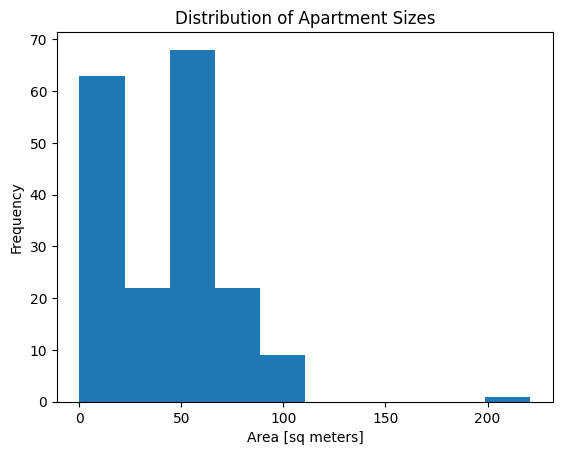

In [5]:
# Assuming df1 is already defined and contains the relevant data
df1['surface_total_in_m2'].plot(kind='hist')

# Label the x-axis
plt.xlabel('Area [sq meters]')

# Add a title to the plot
plt.title('Distribution of Apartment Sizes')

# Display the plot
plt.show()


Yikes! When we see a histogram like the one above, it suggests that there are outliers in our dataset. This can affect model performance  especially in the sorts of linear models.To confirm, let's look at the summary statistics for the `"surface_covered_in_m2"` feature. 

In [6]:
df1.describe()


price  price_aprox_local_currency  price_aprox_usd  \
count  1.405000e+03                1.405000e+03      1405.000000   
mean   1.046514e+06                1.038453e+06     55211.903893   
std    4.108454e+05                4.068822e+05     21632.890549   
min    8.500000e+04                1.471566e+05      7823.940000   
25%    7.270000e+05                7.209187e+05     38329.410000   
50%    9.826100e+05                9.757594e+05     51878.640000   
75%    1.350000e+06                1.337787e+06     71126.750000   
max    1.893000e+06                1.875875e+06     99735.510000   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
count           185.000000            1366.000000        128.000000   
mean             40.486486             105.868228        856.972780   
std              33.535366             875.098328        517.219875   
min               0.000000               0.000000        150.192217   
25%               0.000000              56.000000        525.802514   
50%              49.000000              65.000000        663.105605   
75%              62.000000              80.000000       1042.897404   
max             221.000000           31840.000000       2634.948800   

        price_per_m2  floor      rooms  expenses  
count    1352.000000    0.0  33.000000       1.0  
mean    15615.809943    NaN   1.969697     200.0  
std      7304.931322    NaN   0.636634       NaN  
min        21.231156    NaN   1.000000     200.0  
25%     10836.333330    NaN   2.000000     200.0  
50%     14462.249000    NaN   2.000000     200.0  
75%     19151.868772    NaN   2.000000     200.0  
max    100000.000000    NaN   4.000000     200.0

The statistics above confirm what we suspected. While most of the apartments in our dataset are smaller that 80 square meters, there are some that are several thousand square meters. The best thing to do is to change our `wrangle` function and remove them from the dataset. all observations should fall between the 0.1 and 0.9 quantiles for "surface_covered_in_m2".

In this analysis, we want to investigate the relationship between property size and price. Specifically, we want to understand if larger properties tend to be more expensive or if there's any other observable patter

Text(0, 0.5, 'Price [USD]')

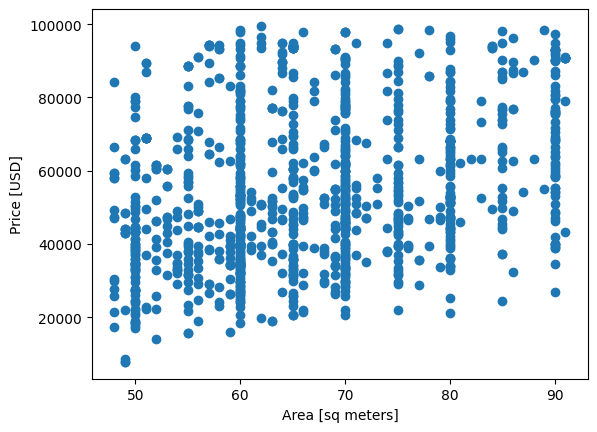

In [11]:
# Assuming df1 is already defined and contains the relevant data
plt.scatter(df1["surface_covered_in_m2"], df1['price_aprox_usd'])

# Label the x-axis
plt.xlabel('Area [sq meters]')

# Label the y-axis
plt.ylabel('Price [USD]')

# Add a title to the plot
plt.title('Relationship Between Apartment Size and Price')

# Display the plot
plt.show()


While prices generally range from 20000 to 100000 dollar, there is no clear correlation between price and property size, as prices vary significantly for similar-sized properties. Common property sizes appear to be around 50, 60, and 70 square meters, and other factors like location or amenities may play a key role in pricing. Additionally, a few outliers suggest some properties are priced unusually high or low for their size.

### Split data

we will use a dataset that contains only one feature "surface_covered_in_m2". This feature represents the property size in square meters and will serve as the sole predictor for our target variable (price) in the model. By focusing on this single feature, we aim to understand how property size alone influences the price.

In [12]:
# Define the feature(s) to be used for training
features = ["surface_covered_in_m2"]

# Extract the feature(s) from the DataFrame
X_train_size = df1[features]

# Define the target variable
target = "price_aprox_usd"

# Extract the target variable from the DataFrame
y_train_size = df1[target]


### Build Model and Evaluating

In [13]:
# Create an instance of the LinearRegression model
Lr = LinearRegression()

# Fit the model to the training data
Lr.fit(X_train_size, y_train_size)

# Predict the target variable for the training data
y_pred_training = Lr.predict(X_train_size)

# Display the first 5 predictions
y_pred_training[:5]


array([48969.71933478, 48407.12575511, 61909.37166716, 50657.50007378,
       45031.56427709])

By using the mean absolute error (MAE) as a metric, we want to evaluate how well our model predicts property prices during the training phase.

In [14]:
# Calculate the Mean Absolute Error (MAE) for the training data
mae_training = mean_absolute_error(y_train_size, y_pred_training)

# Print the MAE for the training data, rounded to 2 decimal places
print("Training MAE:", round(mae_training, 2))


Training MAE: 16296.16


The Mean Absolute Error (MAE) provides a clear interpretation of the average prediction error, indicating that our model's estimates deviate from actual property prices by about $16,296.16. As a metric, MAE does not penalize larger errors more than smaller ones, making it useful for understanding average errors without outlier influence

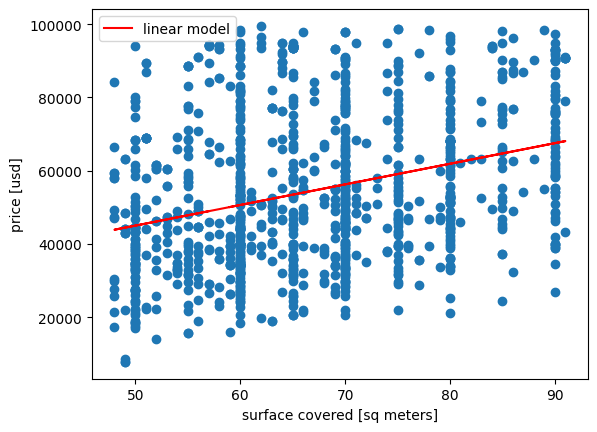

In [15]:
# Plot the linear model predictions
plt.plot(X_train_size['surface_covered_in_m2'], y_pred_training, color='red', label='linear model')

# Scatter plot of the actual training data
plt.scatter(X_train_size, y_train_size)

# Label the x-axis
plt.xlabel("surface covered [sq meters]")

# Label the y-axis
plt.ylabel("price [usd]")

# Add a legend to the plot
plt.legend()


The scatter plot shows a positive correlation between surface area and price, indicating that as the surface area of a property increases, its price tends to increase as well. Prices range from $20,000 to $100,000 for properties between 50 and 90 square meters. 

## 2-Predicting Price with Location

For our model, we're going to consider apartment location, specifically, latitude and longitude. Looking at the output from `frame1.info()`, we can see that the location information is in a single column where the data type is `object`. In order to build our model, we need latitude and longitude to each be in their own column where the data type is `float`. 

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1101 entries, 11 to 4605
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1101 non-null   object 
 1   property_type               1101 non-null   object 
 2   place_with_parent_names     1101 non-null   object 
 3   lat-lon                     1041 non-null   object 
 4   price                       1101 non-null   float64
 5   currency                    1101 non-null   object 
 6   price_aprox_local_currency  1101 non-null   float64
 7   price_aprox_usd             1101 non-null   float64
 8   surface_total_in_m2         101 non-null    float64
 9   surface_covered_in_m2       1101 non-null   float64
 10  price_usd_per_m2            70 non-null     float64
 11  price_per_m2                1101 non-null   float64
 12  floor                       0 non-null      float64
 13  rooms                       6 non-nul

In [17]:
def wrangle(file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Filter the DataFrame for apartments in Distrito Federal with a price less than $100,000
    df = df[(df["property_type"] == "apartment") & 
            (df['place_with_parent_names'].str.contains('Distrito Federal')) & 
            (df['price_aprox_usd'] < 100000)]
    
    # Calculate the 10th and 90th percentiles of the 'surface_covered_in_m2' column
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    
    # Filter the DataFrame to include only rows where 'surface_covered_in_m2' is between the 10th and 90th percentiles
    df = df[df['surface_covered_in_m2'].between(low, high)]
    
    # Split the 'lat-lon' column into separate 'lat' and 'lon' columns and convert them to float
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    
    # Drop the original 'lat-lon' column
    df.drop(columns="lat-lon", inplace=True)
    
    # Return the cleaned DataFrame
    return df


In [18]:
df2 = wrangle(r"C:\Users\asus\Desktop\Portpholio\lab_project\mexico-city-real-estate-1.csv")
df2.head()

operation property_type                  place_with_parent_names  \
11      sell     apartment  |Benito Juárez|Distrito Federal|México|   
20      sell     apartment      |Iztacalco|Distrito Federal|México|   
21      sell     apartment  |Benito Juárez|Distrito Federal|México|   
22      sell     apartment   |Azcapotzalco|Distrito Federal|México|   
26      sell     apartment       |Coyoacán|Distrito Federal|México|   

        price currency  price_aprox_local_currency  price_aprox_usd  \
11  1784569.0      MXN                  1768425.20         94022.66   
20  1345000.0      MXN                  1333148.73         70880.12   
21  1295000.0      MXN                  1283284.95         68228.99   
22   460000.0      MXN                   455838.66         24235.78   
26  1786800.0      MXN                  1770635.95         94140.20   

    surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
11                  NaN                   57.0               NaN   
20                 56.0                   56.0       1265.716429   
21                  NaN                   80.0               NaN   
22                  NaN                   60.0               NaN   
26                  NaN                   50.0               NaN   

    price_per_m2  floor  rooms  expenses  \
11  31308.228070    NaN    NaN       NaN   
20  24017.857140    NaN    NaN       NaN   
21  16187.500000    NaN    NaN       NaN   
22   7666.666667    NaN    NaN       NaN   
26  35736.000000    NaN    NaN       NaN   

                                        properati_url        lat         lon  
11  http://benito-juarez.properati.com.mx/pdji_ven...  23.634501 -102.552788  
20  http://iztacalco.properati.com.mx/r6gm_venta_d...  19.402413  -99.095391  
21  http://benito-juarez.properati.com.mx/qvop_ven...  19.357820  -99.149406  
22  http://prados-del-rosario.properati.com.mx/qba...  19.504985  -99.208557  
26  http://prado-churubusco.properati.com.mx/pm05_...  19.354219  -99.126244

we will use glob to create a list that contains the filenames for all the Mexico real estate CSV files in the data directory

In [19]:
files = glob('C:\\Users\\asus\\Desktop\\Portpholio\\lab_project\\mexico-city-real-estate-*.csv')
files


['C:\\Users\\asus\\Desktop\\Portpholio\\lab_project\\mexico-city-real-estate-1.csv',
 'C:\\Users\\asus\\Desktop\\Portpholio\\lab_project\\mexico-city-real-estate-2.csv',
 'C:\\Users\\asus\\Desktop\\Portpholio\\lab_project\\mexico-city-real-estate-3.csv',
 'C:\\Users\\asus\\Desktop\\Portpholio\\lab_project\\mexico-city-real-estate-4.csv',
 'C:\\Users\\asus\\Desktop\\Portpholio\\lab_project\\mexico-city-real-estate-5.csv']

This code snippet processes multiple files by applying the wrangle function to each, creating a list of DataFrames called frames. It then concatenates these DataFrames into a single DataFrame, df, using pd.concat with ignore_index=True to reset the index

In [21]:
# Apply the wrangle function to each file in the files list and store the results in a list
frames = [wrangle(file) for file in files]

# Concatenate all DataFrames in the frames list into a single DataFrame
# ignore_index=True resets the index in the resulting DataFrame
df2 = pd.concat(frames, ignore_index=True)

# Print a concise summary of the DataFrame, including the number of non-null entries in each column
print(df2.info())

# Display the first few rows of the DataFrame
df2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   5473 non-null   object 
 1   property_type               5473 non-null   object 
 2   place_with_parent_names     5473 non-null   object 
 3   price                       5473 non-null   float64
 4   currency                    5473 non-null   object 
 5   price_aprox_local_currency  5473 non-null   float64
 6   price_aprox_usd             5473 non-null   float64
 7   surface_total_in_m2         541 non-null    float64
 8   surface_covered_in_m2       5473 non-null   float64
 9   price_usd_per_m2            386 non-null    float64
 10  price_per_m2                5473 non-null   float64
 11  floor                       0 non-null      float64
 12  rooms                       22 non-null     float64
 13  expenses                    0 non

operation property_type                  place_with_parent_names      price  \
0      sell     apartment  |Benito Juárez|Distrito Federal|México|  1784569.0   
1      sell     apartment      |Iztacalco|Distrito Federal|México|  1345000.0   
2      sell     apartment  |Benito Juárez|Distrito Federal|México|  1295000.0   
3      sell     apartment   |Azcapotzalco|Distrito Federal|México|   460000.0   
4      sell     apartment       |Coyoacán|Distrito Federal|México|  1786800.0   

  currency  price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0      MXN                  1768425.20         94022.66                  NaN   
1      MXN                  1333148.73         70880.12                 56.0   
2      MXN                  1283284.95         68228.99                  NaN   
3      MXN                   455838.66         24235.78                  NaN   
4      MXN                  1770635.95         94140.20                  NaN   

   surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                   57.0               NaN  31308.228070    NaN    NaN   
1                   56.0       1265.716429  24017.857140    NaN    NaN   
2                   80.0               NaN  16187.500000    NaN    NaN   
3                   60.0               NaN   7666.666667    NaN    NaN   
4                   50.0               NaN  35736.000000    NaN    NaN   

   expenses                                      properati_url        lat  \
0       NaN  http://benito-juarez.properati.com.mx/pdji_ven...  23.634501   
1       NaN  http://iztacalco.properati.com.mx/r6gm_venta_d...  19.402413   
2       NaN  http://benito-juarez.properati.com.mx/qvop_ven...  19.357820   
3       NaN  http://prados-del-rosario.properati.com.mx/qba...  19.504985   
4       NaN  http://prado-churubusco.properati.com.mx/pm05_...  19.354219   

          lon  
0 -102.552788  
1  -99.095391  
2  -99.149406  
3  -99.208557  
4  -99.126244

we're building a multiple linear regression model that predicts price based on two features, `"lon"` and `"lat"`. This means that our data visualizations now have to communicate three pieces of information: Longitude, latitude, and price.
One option is to incorporate color into our scatter plot. For example, in the Mapbox scatter plot below, the location of each point represents latitude and longitude, and color represents price. 

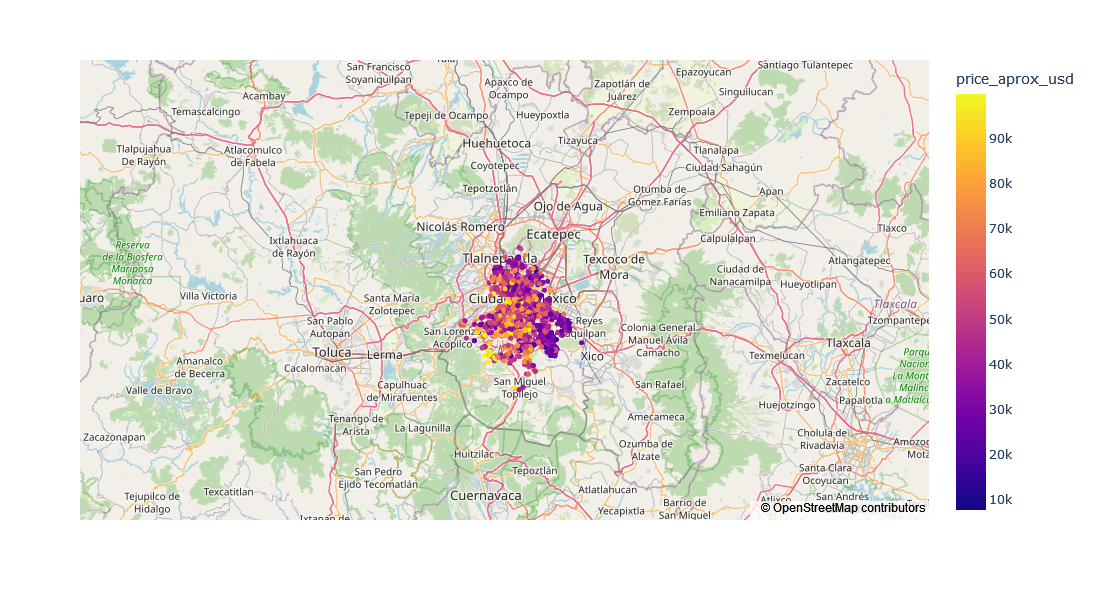

In [22]:
fig = px.scatter_mapbox(
    df2,  # Our DataFrame
    lat='lat',
    lon='lon',
    width=600,  # Width of map
    height=600,  # Height of map
    color='price_aprox_usd',
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

### split data

Even though we're building a different model, the steps we follow will be the same. Let's separate our features (latitude and longitude) from our target (price). 

In [23]:
# Define the features for the model, in this case, longitude and latitude
features = ["lon", "lat"]

# Create the training data for the features
X_train_loc = df2[features]

# Define the target variable, which is the approximate price in USD
target = "price_aprox_usd"

# Create the training data for the target variable
y_train_loc = df2[target]


Usually, we simply dropped rows that contained `NaN` values, but this isn't ideal. Models generally perform better when they have more data to train with, so every row is precious. Instead, we can fill in these missing values using information we get from the whole column — a process called **imputation**. There are many different strategies for imputing missing values, and one of the most common is filling in the missing values with the mean of the column.


We will Create a pipeline named `model` that contains a `SimpleImputer` transformer followed by a `LinearRegression` predictor.

### Build Model and Evaluating

In [24]:
# Create a pipeline model
model1 = make_pipeline(
    # Step 1: Handle missing values by imputing them
    SimpleImputer(),
    
    # Step 2: Apply a linear regression model
    LinearRegression()
)


In [25]:
model1.fit(X_train_loc,y_train_loc)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [26]:
# Predict the target variable using the trained model and the training data
y_pred_training = model1.predict(X_train_loc)

In [27]:
# Calculate the Mean Absolute Error (MAE) for the training set predictions
mae_training = mean_absolute_error(y_train_loc, y_pred_training)

# Print the MAE value for the training set, rounded to two decimal places
print("Training MAE:", round(mae_training, 2))

Training MAE: 17136.27


This suggests that latitude and longitude aren't as strong predictors of price as size is

## 3- Predicting Price with borough                     

Looking through the output from the df.head() , there's a little bit more cleaning we need to do before we can work with the neighborhood information in this dataset

In [28]:
df2.head()

operation property_type                  place_with_parent_names      price  \
0      sell     apartment  |Benito Juárez|Distrito Federal|México|  1784569.0   
1      sell     apartment      |Iztacalco|Distrito Federal|México|  1345000.0   
2      sell     apartment  |Benito Juárez|Distrito Federal|México|  1295000.0   
3      sell     apartment   |Azcapotzalco|Distrito Federal|México|   460000.0   
4      sell     apartment       |Coyoacán|Distrito Federal|México|  1786800.0   

  currency  price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0      MXN                  1768425.20         94022.66                  NaN   
1      MXN                  1333148.73         70880.12                 56.0   
2      MXN                  1283284.95         68228.99                  NaN   
3      MXN                   455838.66         24235.78                  NaN   
4      MXN                  1770635.95         94140.20                  NaN   

   surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                   57.0               NaN  31308.228070    NaN    NaN   
1                   56.0       1265.716429  24017.857140    NaN    NaN   
2                   80.0               NaN  16187.500000    NaN    NaN   
3                   60.0               NaN   7666.666667    NaN    NaN   
4                   50.0               NaN  35736.000000    NaN    NaN   

   expenses                                      properati_url        lat  \
0       NaN  http://benito-juarez.properati.com.mx/pdji_ven...  23.634501   
1       NaN  http://iztacalco.properati.com.mx/r6gm_venta_d...  19.402413   
2       NaN  http://benito-juarez.properati.com.mx/qvop_ven...  19.357820   
3       NaN  http://prados-del-rosario.properati.com.mx/qba...  19.504985   
4       NaN  http://prado-churubusco.properati.com.mx/pm05_...  19.354219   

          lon  
0 -102.552788  
1  -99.095391  
2  -99.149406  
3  -99.208557  
4  -99.126244

We aim to create a new column named "borough" in our dataset by extracting borough information from the "place_with_parent_names" column. This will enable us to categorize and analyze data more effectively based on the 15 boroughs of Mexico City, enhancing our insights into geographical trends and patterns.

In [30]:
def wrangle(file):
    # Load the dataset from the specified CSV file into a pandas DataFrame
    df = pd.read_csv(file)
    
    # Filter the DataFrame to only include apartments located in 'Distrito Federal' and with a price less than $100,000 USD
    df = df[(df["property_type"] == "apartment") & 
            (df['place_with_parent_names'].str.contains('Distrito Federal')) & 
            (df['price_aprox_usd'] < 100000)]
    
    # Compute the 10th and 90th percentiles for the 'surface_covered_in_m2' column
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    
    # Keep only rows where 'surface_covered_in_m2' is between the 10th and 90th percentiles
    df = df[df['surface_covered_in_m2'].between(low, high)]
    
    # Split the 'lat-lon' column into two separate columns: 'lat' and 'lon', converting them to floats
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    
    # Drop the original 'lat-lon' column as it's no longer needed
    df.drop(columns="lat-lon", inplace=True)
    
    # Extract the borough from 'place_with_parent_names' (assumed to be the second element in the split) and create a new 'borough' column
    df['borough'] = df['place_with_parent_names'].str.split('|', expand=True)[1]
    
    # Drop the 'place_with_parent_names' column since it's no longer needed
    df.drop(columns="place_with_parent_names", inplace=True)
    
    # Return the cleaned and filtered DataFrame
    return df


In [32]:
# Import the glob function to retrieve a list of files matching a pattern
all_files = glob('C:\\Users\\asus\\Desktop\\Portpholio\\lab_project\\mexico-city-real-estate-*.csv')

# Use the wrangle function to process each file in the list and store the resulting DataFrames in a list
frames = [wrangle(file) for file in all_files]

# Concatenate the list of DataFrames into a single DataFrame and reset the index
df3 = pd.concat(frames, ignore_index=True)

# Print information about the concatenated DataFrame, including column types and number of non-null values
print(df3.info())

# Display the first 5 rows of the concatenated DataFrame
df3.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   5473 non-null   object 
 1   property_type               5473 non-null   object 
 2   price                       5473 non-null   float64
 3   currency                    5473 non-null   object 
 4   price_aprox_local_currency  5473 non-null   float64
 5   price_aprox_usd             5473 non-null   float64
 6   surface_total_in_m2         541 non-null    float64
 7   surface_covered_in_m2       5473 non-null   float64
 8   price_usd_per_m2            386 non-null    float64
 9   price_per_m2                5473 non-null   float64
 10  floor                       0 non-null      float64
 11  rooms                       22 non-null     float64
 12  expenses                    0 non-null      float64
 13  properati_url               5473 

operation property_type      price currency  price_aprox_local_currency  \
0      sell     apartment  1784569.0      MXN                  1768425.20   
1      sell     apartment  1345000.0      MXN                  1333148.73   
2      sell     apartment  1295000.0      MXN                  1283284.95   
3      sell     apartment   460000.0      MXN                   455838.66   
4      sell     apartment  1786800.0      MXN                  1770635.95   

   price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0         94022.66                  NaN                   57.0   
1         70880.12                 56.0                   56.0   
2         68228.99                  NaN                   80.0   
3         24235.78                  NaN                   60.0   
4         94140.20                  NaN                   50.0   

   price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
0               NaN  31308.228070    NaN    NaN       NaN   
1       1265.716429  24017.857140    NaN    NaN       NaN   
2               NaN  16187.500000    NaN    NaN       NaN   
3               NaN   7666.666667    NaN    NaN       NaN   
4               NaN  35736.000000    NaN    NaN       NaN   

                                       properati_url        lat         lon  \
0  http://benito-juarez.properati.com.mx/pdji_ven...  23.634501 -102.552788   
1  http://iztacalco.properati.com.mx/r6gm_venta_d...  19.402413  -99.095391   
2  http://benito-juarez.properati.com.mx/qvop_ven...  19.357820  -99.149406   
3  http://prados-del-rosario.properati.com.mx/qba...  19.504985  -99.208557   
4  http://prado-churubusco.properati.com.mx/pm05_...  19.354219  -99.126244   

         borough  
0  Benito Juárez  
1      Iztacalco  
2  Benito Juárez  
3   Azcapotzalco  
4       Coyoacán

### Split data

We will create the feature matrix X_train and the target vector y_train for our regression model. The feature matrix X_train will include one feature, "borough," which represents the neighborhoods in our dataset. The target vector y_train will consist of the "price_aprox_usd," indicating the approximate prices in USD that we aim to predict.

In [34]:
# Define the target variable as 'price_aprox_usd'
target = "price_aprox_usd"

# Define the features (input variables) to use for training, in this case, only 'borough'
features = ["borough"]

# Assign the 'price_aprox_usd' column from df3 to the target variable y_train_bor
y_train_bor = df3[target]

# Assign the 'borough' column(s) from df3 to the feature variable X_train_bor
X_train_bor = df3[features]


We will begin by creating a pipeline named model that integrates a OneHotEncoder and a Ridge predictor. First, we instantiate the OneHotEncoder with the use_cat_names argument set to True to handle the categorical feature "borough." Finally, we will fit the model pipeline to the training data, enabling us to predict housing prices based on the encoded neighborhood features.

### Build Model and Evaluating

In [36]:
# Create a machine learning pipeline with OneHotEncoder and Ridge regression
model2 = make_pipeline(
    # OneHotEncoder: Encodes categorical features into a format suitable for machine learning algorithms.
    # use_cat_names=True is used to retain meaningful feature names after encoding (if using a library like category_encoders)
    OneHotEncoder(use_cat_names=True), 
    
    # Ridge: Ridge regression model that adds L2 regularization to help prevent overfitting
    Ridge()
)

# Fit the pipeline to the training data (X_train_bor as features, y_train_bor as target)
model2.fit(X_train_bor, y_train_bor)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['borough'], use_cat_names=True)),
                ('ridge', Ridge())])

In [38]:
# Use the trained model to make predictions on the training data (X_train_bor)
y_pred_training = model2.predict(X_train_bor)

# Calculate the Mean Absolute Error (MAE) between the true values (y_train_bor) and the predicted values (y_pred_training)
mae_training = mean_absolute_error(y_train_bor, y_pred_training)

# Print the MAE for the training set, rounded to two decimal places
print("Training MAE:", round(mae_training, 2))


Training MAE: 15249.48


Our MAE is better than that of the size model, but we need to test our model on unseen data as well as on the training data for price, using features such as size, location, and borough.

## 4- Predicting Price with Size, Location, and Neighborhood


we're going to try to use all the features in our dataset to improve our model. This means that we'll have to do a more careful cleaning of the dataset and consider some of the finer points of linear models.

The first thing we need to consider when trying to use all the features `df` is **missing values**. While it's true we can impute missing values, there still needs to be enough data in a column to do a good imputation. A general rule is that, if more than half of the data in a column is missing, it's better to drop it then try imputing.



In [41]:
# Calculate the proportion of missing values for each column in the DataFrame df3
missing_values_ratio = df3.isnull().sum() / len(df3)

# Display the proportion of missing values for each column
print(missing_values_ratio)


operation                     0.000000
property_type                 0.000000
price                         0.000000
currency                      0.000000
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.901151
surface_covered_in_m2         0.000000
price_usd_per_m2              0.929472
price_per_m2                  0.000000
floor                         1.000000
rooms                         0.995980
expenses                      1.000000
properati_url                 0.000000
lat                           0.059200
lon                           0.059200
borough                       0.000000
dtype: float64

We will Modify our wrangle function to drop any columns that are more than half NaN values

In [42]:
# Build your wrangle function
def wrangle(file):
    # Load the dataset from the specified CSV file into a pandas DataFrame
    df = pd.read_csv(file)
    
    # Filter the DataFrame to include only apartments in 'Distrito Federal' with a price less than $100,000 USD
    df = df[(df["property_type"] == "apartment") & 
            (df['place_with_parent_names'].str.contains('Distrito Federal')) & 
            (df['price_aprox_usd'] < 100000)]
    
    # Compute the 10th and 90th percentiles for the 'surface_covered_in_m2' column
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    
    # Keep only rows where 'surface_covered_in_m2' is between the 10th and 90th percentiles
    df = df[df['surface_covered_in_m2'].between(low, high)]
    
    # Split the 'lat-lon' column into two separate columns: 'lat' and 'lon', converting them to floats
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    
    # Drop the original 'lat-lon' column as it's no longer needed
    df.drop(columns="lat-lon", inplace=True)
    
    # Extract the borough from 'place_with_parent_names' (assumed to be the second element in the split) and create a new 'borough' column
    df['borough'] = df['place_with_parent_names'].str.split('|', expand=True)[1]
    
    # Drop the 'place_with_parent_names' column since it's no longer needed
    df.drop(columns="place_with_parent_names", inplace=True)
    
    # Drop columns that have a high proportion of missing values or are not useful for analysis
    df.drop(columns=['surface_total_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses'], inplace=True)  # Null columns
    
    # Drop low or high cardinality columns that do not contribute meaningfully to the analysis
    df.drop(columns=['operation', 'property_type', 'currency', 'properati_url'], inplace=True)  # Low or high cardinality

    # Drop any columns that could constitute leakage from the target variable
    df.drop(columns=['price', 'price_aprox_local_currency', 'price_per_m2'], inplace=True)

    # Return the cleaned and filtered DataFrame
    return df


In [43]:
# Import the glob function to retrieve a list of files matching a specific pattern
files = glob('C:\\Users\\asus\\Desktop\\Portpholio\\lab_project\\mexico-city-real-estate-*.csv')

# Apply the wrangle function to each file in the list, creating a list of processed DataFrames
frames = [wrangle(file) for file in files]

# Concatenate all the processed DataFrames into a single DataFrame and reset the index
df = pd.concat(frames, ignore_index=True)

# Print summary information about the final DataFrame, including column types and number of non-null values
print(df.info())

# Display the first 5 rows of the concatenated DataFrame for inspection
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        5473 non-null   float64
 1   surface_covered_in_m2  5473 non-null   float64
 2   lat                    5149 non-null   float64
 3   lon                    5149 non-null   float64
 4   borough                5473 non-null   object 
dtypes: float64(4), object(1)
memory usage: 213.9+ KB
None


price_aprox_usd  surface_covered_in_m2        lat         lon  \
0         94022.66                   57.0  23.634501 -102.552788   
1         70880.12                   56.0  19.402413  -99.095391   
2         68228.99                   80.0  19.357820  -99.149406   
3         24235.78                   60.0  19.504985  -99.208557   
4         94140.20                   50.0  19.354219  -99.126244   

         borough  
0  Benito Juárez  
1      Iztacalco  
2  Benito Juárez  
3   Azcapotzalco  
4       Coyoacán

The next thing we need to look out for are categorical columns with **low or high cardinality**. If there's only one category in a column, it won't provide any unique information to our model. At the other extreme, columns where nearly every row has its own category won't help our model in identifying useful trends in the data.

Let's take a look at the cardinality of our features.

In [59]:
# Calculate the number of unique values for each categorical (object type) column in the DataFrame df
unique_counts = df.select_dtypes('object').nunique()

# Display the counts of unique values for each categorical column
print(unique_counts)


borough    15
dtype: int64


Here, we can see that columns like `"operation"` have only one value in them, while every row in `"properati_url"` has a unique value. These are clear examples of high- and low-cardinality features that we shouldn't include in our model.
we should Modify our `wrangle` function to drop high- and low-cardinality categorical features

It's also important for us to drop any columns that would constitute **leakage**, that is, features that were created using our target or that would give our model information that it won't have access to when it's deployed. 
We should modify our wrangle function to drop any features that would constitute leakage. 

In [45]:
df.head()

price_aprox_usd  surface_covered_in_m2        lat         lon  \
0         94022.66                   57.0  23.634501 -102.552788   
1         70880.12                   56.0  19.402413  -99.095391   
2         68228.99                   80.0  19.357820  -99.149406   
3         24235.78                   60.0  19.504985  -99.208557   
4         94140.20                   50.0  19.354219  -99.126244   

         borough  
0  Benito Juárez  
1      Iztacalco  
2  Benito Juárez  
3   Azcapotzalco  
4       Coyoacán

We will Create a histogram showing the distribution of apartment prices (`"price_aprox_usd"`) in `df`

Text(0.5, 1.0, 'Distribution of Apartment Prices')

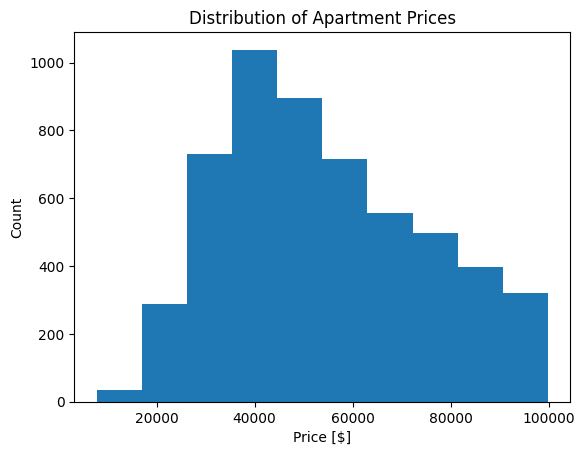

In [46]:
# Build histogram
plt.hist(df['price_aprox_usd'])

# Add labels and title
plt.xlabel('Price [$]')
plt.ylabel('Count')
plt.title('Distribution of Apartment Prices')



The distribution of apartment prices appears to be slightly skewed to the right. This means that there is a tail on the right side of the histogram, indicating that there are a few higher-priced apartments compared to the majority of apartments. However, the skew is not very pronounced, and the distribution is generally quite symmetrical.   

### Split data

We will create the feature matrix X and the target vector y for our regression model using the cleaned DataFrame. The target vector will consist of the "price_aprox_usd" values, while the feature matrix will include all other columns, excluding this target variable. To achieve this, we first define the target variable as target = 'price_aprox_usd', then create the feature matrix by dropping this column from the DataFrame: X = df.drop(columns=[target]). The target vector is set to y = df[target]. Finally, we split the data into training and testing sets, allocating 80% for training and 20% for testing using train_test_split(X, y, test_size=0.2, random_state=42). This setup prepares the data for fitting a regression model.

In [47]:
target = 'price_aprox_usd'
X = df.drop(columns = ['price_aprox_usd'])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Build Model

#### Baseline

A baseline model serves as a reference point for evaluating the performance of more complex models. It typically uses simple algorithms or statistical methods, such as predicting the mean the target variable

In [48]:
# Calculate the mean of the training target values (apartment prices)
y_mean = y_train.mean()

# Create a baseline prediction using the mean value for all instances in the training set
y_pred_baseline = [y_mean] * len(y_train)

# Calculate the Mean Absolute Error (MAE) of the baseline predictions
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)

# Print the mean apartment price and the baseline MAE for reference
print("Mean apt price:", y_mean)          # Display the mean apartment price
print("Baseline MAE:", baseline_mae)      # Display the MAE for the baseline model


Mean apt price: 54383.042601644585
Baseline MAE: 17189.617520327247


We will create a pipeline named model that includes all the necessary transformers for preprocessing the dataset, along with a selected predictor used in this project. This pipeline will streamline the data preparation and modeling process by ensuring that all transformations are applied consistently. After constructing the pipeline, we will fit the model to the training data, enabling it to learn from the processed features and prepare for making predictions on unseen data.

#### Build Model 

In [50]:
# Build Model
model = make_pipeline(OneHotEncoder(use_cat_names = True),
                    SimpleImputer(),  
                    Ridge())
## fit model
model.fit(X_train,y_train)
  


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['borough'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

#### Evaluate

To evaluate our model's performance, we will test it using `X_test` .This involves applying the model to the test data that has not been seen during training. 

In [51]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 15200.246518925873


Our model's MAE of about 15,200.25 is lower than the baseline, it indicates that the model is effectively improving upon the baseline predictions. This comparison suggests that our model is capturing patterns in the data better than a simple mean prediction, highlighting its potential effectiveness in forecasting the target variable.

### Communicate Results

We will create a Series named feat_imp. The index should contain the names of all the features our model considers when making predictions; the values should be the coefficient values associated with each feature. The Series should be sorted ascending by absolute value.

In [52]:
# Extract the coefficients of the Ridge regression model from the pipeline
coefficients = model.named_steps["ridge"].coef_

# Get the names of the features generated by the OneHotEncoder
features = model.named_steps["onehotencoder"].get_feature_names_out()

# Create a pandas Series to associate each feature name with its corresponding coefficient
feat_imp = pd.Series(coefficients, index=features)

# Sort the features by the absolute value of their coefficients to identify the most influential features
sorted_feat_imp = feat_imp.sort_values(key=abs)

# Display the sorted feature importance
print(sorted_feat_imp)


C:\Users\asus\anaconda3\Lib\site-packages\category_encoders\utils.py:366: FutureWarning:

`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.



surface_covered_in_m2               282.608340
borough_Xochimilco                 -483.257779
lat                                 885.350311
borough_Iztacalco                  -961.817925
borough_Cuauhtémoc                -1246.237298
borough_Miguel Hidalgo             1937.515193
borough_Azcapotzalco               1988.526258
lon                               -2451.438015
borough_Álvaro Obregón             2694.959313
borough_Coyoacán                   3101.566307
borough_La Magdalena Contreras    -4056.135823
borough_Venustiano Carranza       -4744.686435
borough_Gustavo A. Madero         -7173.193649
borough_Tlalpan                   10689.861171
borough_Cuajimalpa de Morelos     11876.779993
borough_Iztapalapa               -13340.841584
borough_Benito Juárez             13632.729427
borough_Tláhuac                  -13915.767167
dtype: float64

We will create a horizontal bar chart to display the 10 most influential coefficients of our linear regression model.By extracting the coefficients from the fitted model and calculating their absolute values, we can identify the top 10 features with the largest influence. The resulting chart will allow us to easily interpret which features have the most substantial positive or negative effects on predictions, enhancing our understanding of the model's behavior and the key drivers within the dataset.


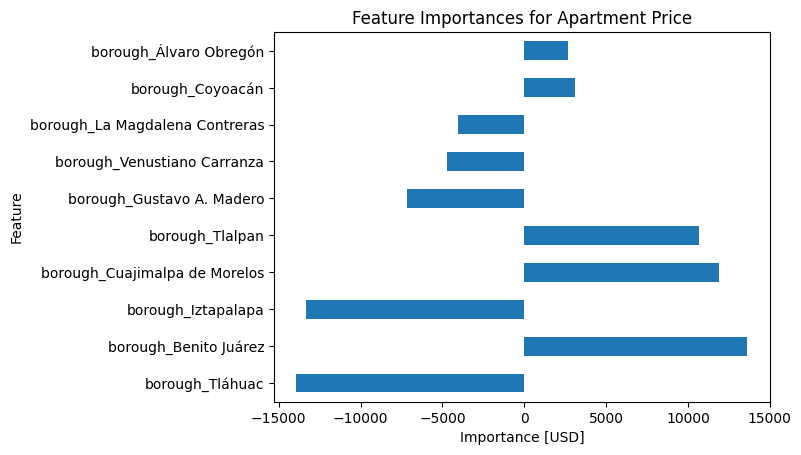

In [53]:
# Sort the feature importances by absolute value in descending order and select the top 10 features
feat_imp.sort_values(key=abs, ascending=False)[0:10].plot(kind="barh")

# Label the x-axis as "Importance [USD]"
plt.xlabel("Importance [USD]")  # Represents the importance of each feature in predicting the apartment price

# Label the y-axis as "Feature"
plt.ylabel("Feature")  # Represents the names of the features

# Add a title to the plot
plt.title("Feature Importances for Apartment Price")  # Title describing what the plot represents

# Display the plot
plt.show()


The horizontal bar chart depicts the most influential boroughs (features) in predicting apartment prices in Mexico City. Here's what we can derive from the chart:

    Positive Impact on Price: Boroughs like Benito Juárez and Tláhuac have the most significant positive influence on apartment prices. Apartments located in these boroughs are expected to have higher prices compared to others, as indicated by the positive coefficient values close to or above 10,000 USD.

    Negative Impact on Price: Boroughs such as Álvaro Obregón and Coyoacán exhibit a smaller but notable negative impact on apartment prices. This suggests that apartments in these areas are priced lower than average, with negative coefficients indicating their effect reduces the predicted price by around 2,500 to 3,000 USD.

    Moderate Influence: Boroughs like La Magdalena Contreras and Venustiano Carranza exhibit moderate influence, suggesting that their apartment prices are somewhat stable or have a smaller effect on the overall prediction, with positive coefficients in the range of 2,000 to 5,000 USD.

    Significant Influence from Other Boroughs: Iztapalapa and Cuajimalpa de Morelos also stand out with strong positive impacts, showing that their locations are associated with higher predicted prices, although they fall below Benito Juárez and Tláhuac.

## Insights

The analysis revealed several key insights:

    -Borough Influence: Certain boroughs, such as Benito Juárez and Tláhuac, had the most positive influence on apartment prices. Boroughs like Álvaro Obregón and Coyoacán showed a negative impact, indicating a lowering effect on apartment prices.
    
    -Size Influence: Apartment size (in square meters) was another critical factor, with larger apartments being more expensive, but to a lesser degree compared to the influence of the borough.

    -Model Performance: The improved model outperformed the baseline by reducing the MAE from ~17k USD to ~15k USD. While the improvement was notable, further optimization could yield better results.

## Solutions

Proposed Solution:

    Solution 1: Model Optimization:
    
        -Pro: By using more advanced models such as Gradient Boosting or Neural Networks, we could potentially further reduce the MAE.
        -Con: These models may require more computational resources and may overfit if not carefully tuned.

    Solution 2: Feature Engineering:
    
        -Pro: Additional features such as proximity to schools, public transport, or socio-economic data might significantly improve predictions.
        -Con: Collecting and incorporating these features would require access to external datasets and may introduce complexity into the model.

    Solution 3: Using Time-Series Data:
    
        -Pro: Incorporating time-based trends (seasonal or yearly) in real estate pricing could enhance the model’s accuracy.
        -Con: Requires historical data that may not be available, and time-series models are harder to implement in such complex scenarios.

## Conclusion

This case study highlights the importance of location in determining apartment prices. The machine learning model was able to reasonably predict prices based on factors like borough and size, with a performance improvement over the baseline. The project demonstrated the value of data in making real-estate pricing decisions and provided insights into how the borough plays a critical role in influencing prices.

Key Takeaways:

    -Location (borough) is a dominant factor influencing apartment prices.
    
    -Predictive modeling using real estate data is feasible, but there are limitations in data availability and model complexity.
    
    -Future work should focus on improving model accuracy by incorporating more advanced methods and additional relevant features.